<a href="https://colab.research.google.com/github/bryanfandawa/telecom-churn-project/blob/main/notebooks/customer_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#upload from local drive
from google.colab import files
uploaded = files.upload()

Saving cleaned_telecom_churn.csv to cleaned_telecom_churn.csv


In [4]:
#read file and save to dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned_telecom_churn.csv']))

In [5]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_dsl,internet_service_fiber_optic,internet_service_no,contract_month-to-month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  7032 non-null   int64  
 1   senior_citizen                          7032 non-null   int64  
 2   partner                                 7032 non-null   int64  
 3   dependents                              7032 non-null   int64  
 4   tenure                                  7032 non-null   int64  
 5   phone_service                           7032 non-null   int64  
 6   multiple_lines                          7032 non-null   int64  
 7   online_security                         7032 non-null   int64  
 8   online_backup                           7032 non-null   int64  
 9   device_protection                       7032 non-null   int64  
 10  tech_support                            7032 non-null   int6

gender = 1 for male, 0 for female  
senior_citizen = 1 for senior, 0 for non-senior  
partner = 1 for yes (customer has a partner), 0 for no  
dependents = 1 for yes (customer has dependents), 0 for no  
tenure = number of months the customer has stayed with the company  

phone_service = 1 for yes (customer has a phone service), 0 for no  
multiple_lines = 1 for yes (customer has multiple lines), 0 for no  
internet_service_dsl = 1 if customer uses DSL internet, 0 otherwise  
internet_service_fiber_optic = 1 if customer uses Fiber Optic internet, 0 otherwise  
online_security = 1 if customer has online security, 0 otherwise  
online_backup = 1 if customer has online backup, 0 otherwise  
device_protection = 1 if customer has device protection, 0 otherwise  
tech_support = 1 if customer has tech support, 0 otherwise  
streaming_tv = 1 if customer has streaming TV, 0 otherwise  
streaming_movies = 1 if customer has streaming movies, 0 otherwise  

paperless_billing = 1 for yes (paperless billing enabled), 0 for no  
payment_method_bank_transfer_automatic = 1 for yes, 0 for no  
payment_method_credit_card_automatic = 1 for yes, 0 for no  
payment_method_electronic_check = 1 for yes, 0 for no  

contract_month-to-month = 1 for yes, 0 for no  
contract_one_year = 1 for yes, 0 for no  

monthly_charges = amount charged to the customer each month  
total_charges = total amount charged over the customer's tenure  
churn = 1 if customer left the company, 0 if customer stayed  


<function matplotlib.pyplot.show(close=None, block=None)>

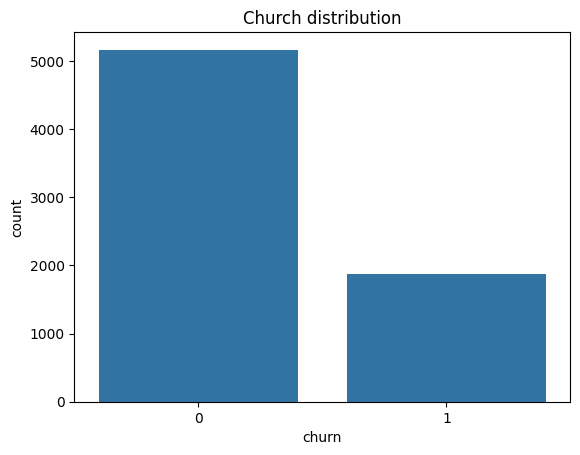

In [7]:
sns.countplot(x = "churn", data = df)
plt.title("Church distribution")
plt.show

We can see from the plot above that the number of people staying (0) and leaving (1) is significantly different.

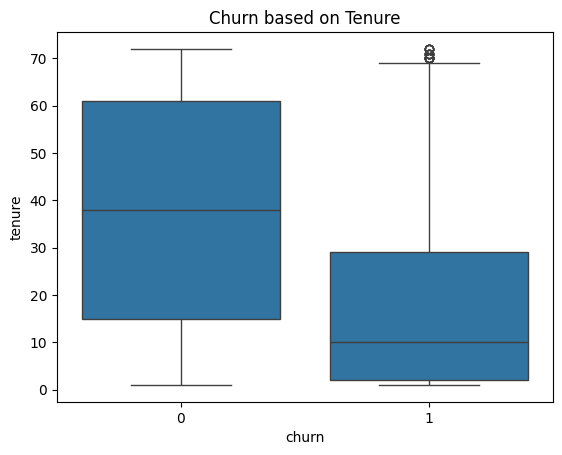

In [8]:
sns.boxplot(x = "churn", y = "tenure", data = df)
plt.title("Churn based on Tenure")
plt.show()

From the boxplot above, we can see that customers that stayed with the company shorter are more likely to leave.

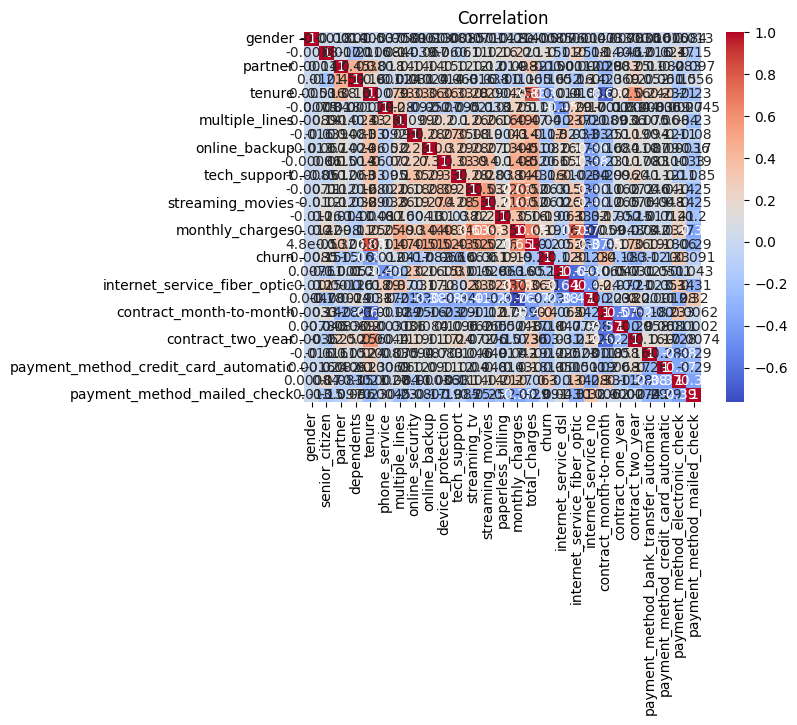

In [9]:
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation")
plt.show()

In [10]:
cor = df.corr()["churn"].sort_values(ascending = False)
print(cor)

churn                                     1.000000
contract_month-to-month                   0.404565
internet_service_fiber_optic              0.307463
payment_method_electronic_check           0.301455
monthly_charges                           0.192858
paperless_billing                         0.191454
senior_citizen                            0.150541
streaming_tv                              0.063254
streaming_movies                          0.060860
multiple_lines                            0.040033
phone_service                             0.011691
gender                                   -0.008545
device_protection                        -0.066193
online_backup                            -0.082307
payment_method_mailed_check              -0.090773
payment_method_bank_transfer_automatic   -0.118136
internet_service_dsl                     -0.124141
payment_method_credit_card_automatic     -0.134687
partner                                  -0.149982
dependents                     

Positive correlation:

contract_month-to-month                   0.404565

internet_service_fiber_optic              0.307463

payment_method_electronic_check           0.301455

monthly_charges                           0.192858

paperless_billing                         0.191454

senior_citizen                            0.150541

Positive correlation interpretation:
Customers that has a month-to-month contract is more likely to churn based on patterns. Customers that uses the internet service fiber_optic is more likely to churn based on patterns.

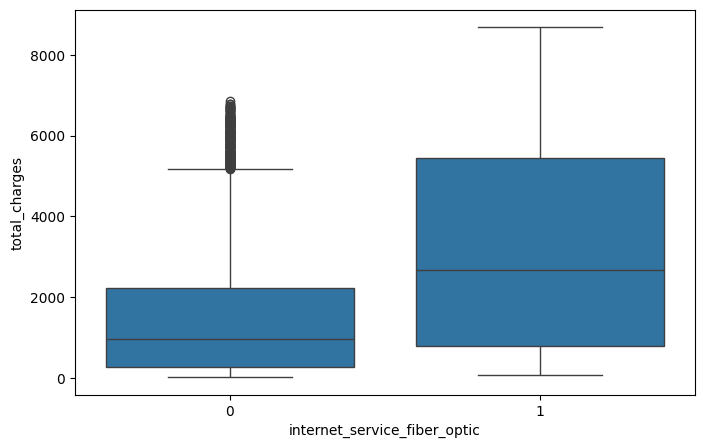

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='internet_service_fiber_optic',
    y='total_charges',
    data=df
)
plt.show()

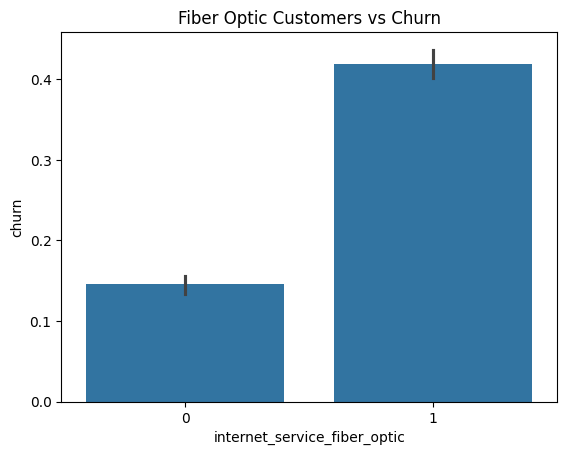

In [12]:
sns.barplot(x='internet_service_fiber_optic', y='churn', data=df)
plt.title("Fiber Optic Customers vs Churn")
plt.show()

Weak correlations:

streaming_tv                              0.063254

streaming_movies                          0.060860

multiple_lines                            0.040033

phone_service                             0.011691

gender                                   -0.008545

device_protection                        -0.066193

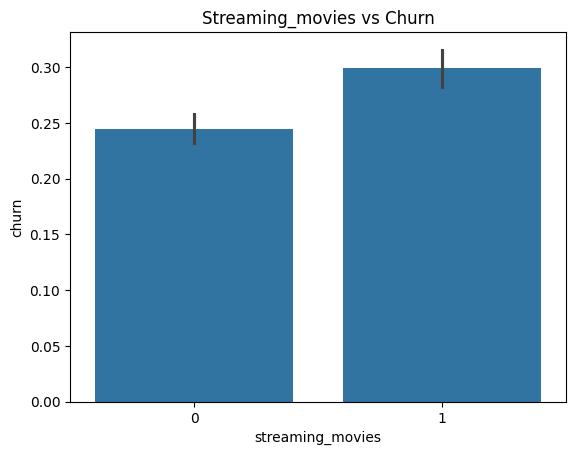

In [13]:
sns.barplot(x = "streaming_movies", y = "churn", data = df)
plt.title("Streaming_movies vs Churn")
plt.show()

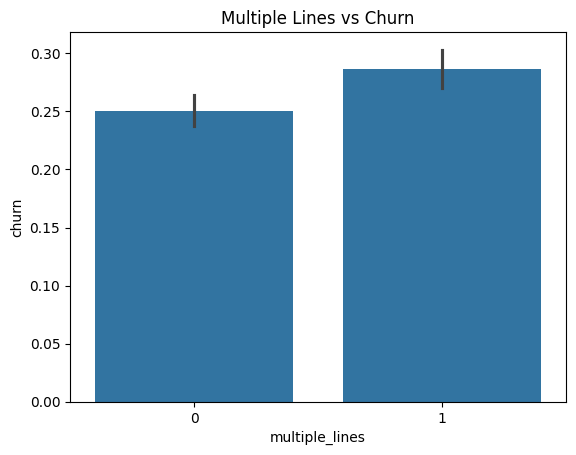

In [14]:
sns.barplot(x = "multiple_lines", y = "churn", data = df)
plt.title("Multiple Lines vs Churn")
plt.show()

Negative correlations:

device_protection                        -0.066193

online_backup                            -0.082307

payment_method_mailed_check              -0.090773

payment_method_bank_transfer_automatic   -0.118136

internet_service_dsl                     -0.124141

payment_method_credit_card_automatic     -0.134687

partner                                  -0.149982

dependents                               -0.163128

tech_support                             -0.164716

online_security                          -0.171270

contract_one_year                        -0.178225

total_charges                            -0.199484

internet_service_no                      -0.227578

contract_two_year                        -0.301552

tenure                                   -0.354049

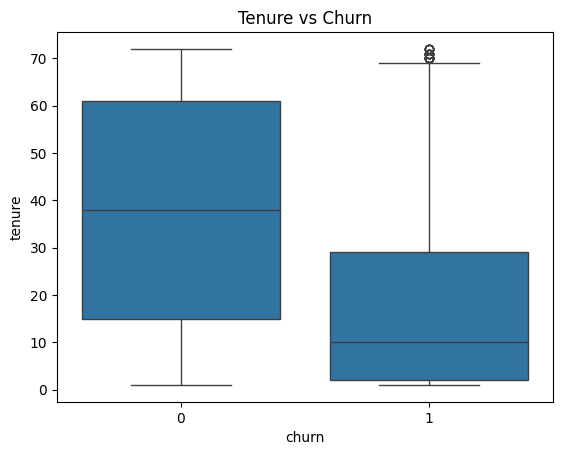

In [15]:
sns.boxplot(x = "churn", y = "tenure", data = df)
plt.title("Tenure vs Churn")
plt.show()

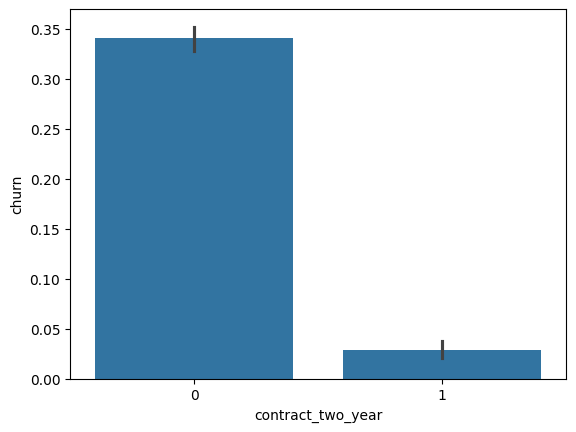

In [16]:
sns.barplot(x = "contract_two_year", y = "churn", data = df)
plt.show()

Let us plot some possible interactions

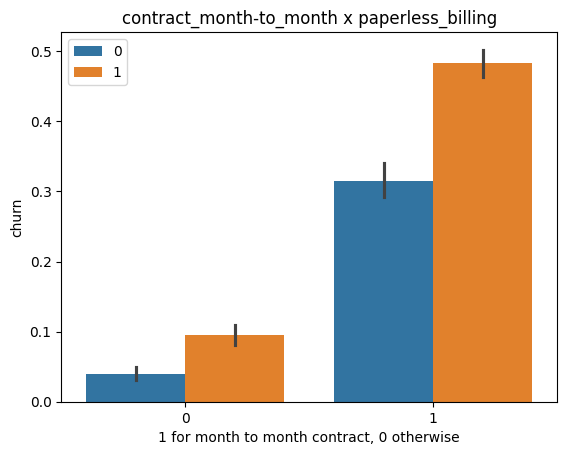

In [17]:
sns.barplot(
    x=df["contract_month-to-month"],
    y=df["churn"],
    hue=df["paperless_billing"]
)
plt.legend()
plt.title("contract_month-to_month x paperless_billing")
plt.xlabel("1 for month to month contract, 0 otherwise")
plt.ylabel("churn")
plt.show()

We can see that there is a difference of height of customer churning when they use paperless billings and not a month to month contract and month to month contract. Paperless billing does not cause churn by itself. But for customers already on flexible short contracts, paperless billing interacts with contract type to increase churn risk.

In [18]:
df["paperless_x_month"] = df["paperless_billing"] * df["contract_month-to-month"]

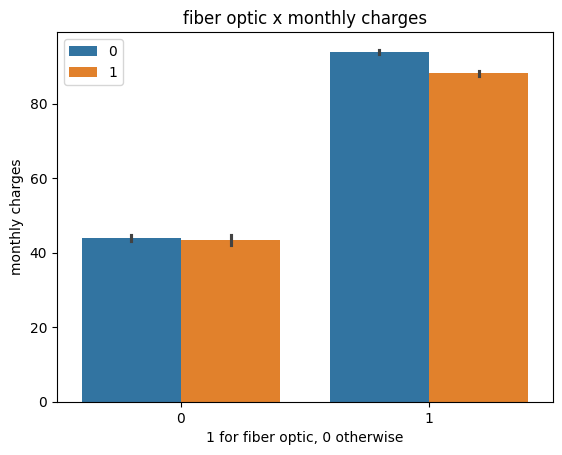

In [19]:
sns.barplot(x = "internet_service_fiber_optic", y = "monthly_charges", hue = "churn", data = df)
plt.legend()
plt.title("fiber optic x monthly charges")
plt.xlabel("1 for fiber optic, 0 otherwise")
plt.ylabel("monthly charges")
plt.show()

Since the difference is not much, I don't think there is any interaction between the two variables.

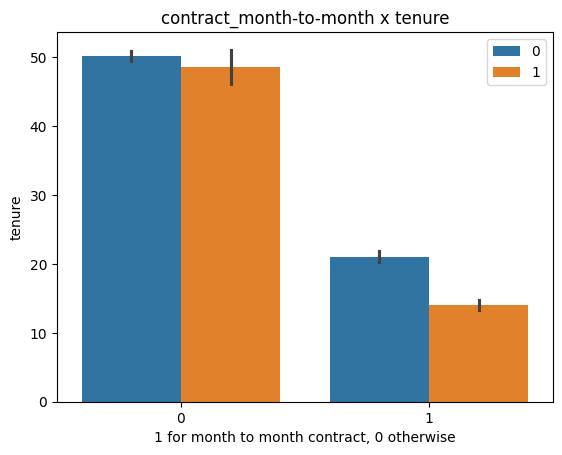

In [20]:
sns.barplot(x = "contract_month-to-month", y = "tenure", hue = "churn", data = df)
plt.legend()
plt.title("contract_month-to-month x tenure")
plt.xlabel("1 for month to month contract, 0 otherwise")
plt.ylabel("tenure")
plt.show()

There is a slight interaction here, so we are going to make a new variable for this interaction

In [21]:
df["tenure_x_month"] = df["tenure"] * df["contract_month-to-month"]

In [22]:
df.columns.tolist()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'internet_service_dsl',
 'internet_service_fiber_optic',
 'internet_service_no',
 'contract_month-to-month',
 'contract_one_year',
 'contract_two_year',
 'payment_method_bank_transfer_automatic',
 'payment_method_credit_card_automatic',
 'payment_method_electronic_check',
 'payment_method_mailed_check',
 'paperless_x_month',
 'tenure_x_month']

I'm dropping internet_service_no, contract_two_year, and payment_method_mailed_check because those are dummy variables. I want to prevent multicollinearity

In [23]:
cols_to_drop = [
    "internet_service_no",
    "contract_two_year",
    "payment_method_mailed_check"
]
df = df.drop(columns=cols_to_drop)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

X = df.drop(columns = "churn")
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size = 0.2)
scaler = StandardScaler()
numeric_features = ["tenure", "monthly_charges", "total_charges", "tenure_x_month"]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

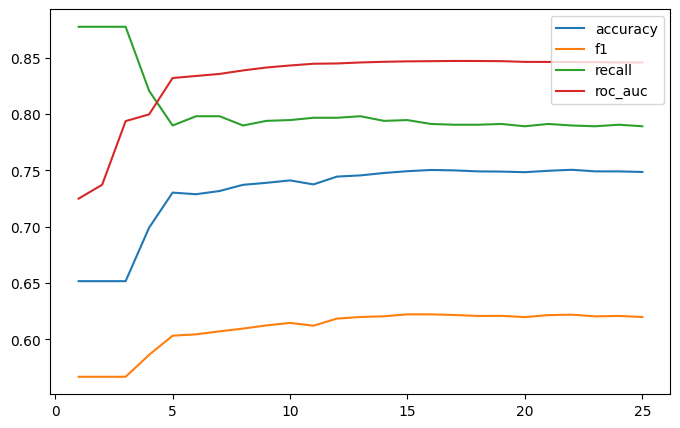

In [25]:
metrics = ["accuracy", "f1", "recall", "roc_auc"]
scores = {m: [] for m in metrics}
model = LogisticRegression(max_iter = 4000, random_state = 5, class_weight = "balanced")
n_features = []

for i in range(1, X_train_scaled.shape[1] + 1):
  rfe = RFE(estimator = model, n_features_to_select = i)
  rfe.fit(X_train_scaled, y_train)
  selected = X_train.columns[rfe.support_]
  X_selected = X_train_scaled[selected]

  for m in metrics:
    cross_val = cross_val_score(model, X_selected, y_train, scoring = m, cv = 5)
    scores[m].append(cross_val.mean())
  n_features.append(i)

plt.figure(figsize = (8, 5))
for m in metrics:
  sns.lineplot(x = n_features, y = scores[m], label = m)
plt.legend()
plt.show()

In [26]:
features_best = max(scores["roc_auc"])
n_best = n_features[scores["roc_auc"].index(features_best)]

print(f"best score: {features_best}")
print(f"best n: {n_best}")

best score: 0.8471461202955093
best n: 17


In [27]:
rfe_final = RFE(estimator = model, n_features_to_select = n_best)
rfe_final.fit(X_train_scaled, y_train)
selected_features = X_train_scaled.columns[rfe_final.support_]

selected_features = selected_features.tolist()

Sine interaction term doesn't work individually, RFE doesn't see its importance. From above we can see that only 1 out of 2 interactions are included in the selected features. We are going to add an extra interaction of paperless x month for our final model.

In [28]:
final_features = selected_features
final_features.append("paperless_x_month")
X_selected_train = X_train_scaled[final_features]
X_selected_test = X_test_scaled[final_features]
model.fit(X_selected_train, y_train)
y_pred = model.predict(X_selected_test)
y_pred_prob = model.predict_proba(X_selected_test)[:,1]

print("Logistic Regression Final")
print(classification_report(y_test, y_pred))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_prob)}")

Logistic Regression Final
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       999
           1       0.55      0.83      0.66       408

    accuracy                           0.75      1407
   macro avg       0.73      0.78      0.73      1407
weighted avg       0.81      0.75      0.76      1407

Test ROC-AUC: 0.8436193546487664


Let's try using a different model and see if it will increase the score

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, max_depth = 10, class_weight = "balanced", random_state = 5)
cross_val_rf = cross_val_score(rf, X_train_scaled, y_train, cv = 5, scoring = "roc_auc", n_jobs = -1)
print(f"ROC-AUC (default RF model): {cross_val_rf.mean()}")

ROC-AUC (default RF model): 0.8439014821988812


Let's try to tune the hyperparameters to see if it will help the model's score

In [30]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(class_weight = "balanced", random_state = 5),
                    param_grid,
                    cv = 5,
                    scoring = "roc_auc",
                    n_jobs = -1)
grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.8444848706762436


In [31]:
rf_final = RandomForestClassifier(max_depth = 10, min_samples_split = 10, n_estimators = 300,
                                  class_weight = "balanced", random_state = 5)
rf_final.fit(X_train_scaled, y_train)
y_pred_rf = rf_final.predict(X_test_scaled)
y_pred_prob_rf = rf_final.predict_proba(X_test_scaled)[:,1]
print("Random Forest Final")
print(classification_report(y_test, y_pred_rf))
print(f"Test for ROC-AUC: {roc_auc_score(y_test, y_pred_prob_rf)}")

Random Forest Final
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       999
           1       0.59      0.74      0.66       408

    accuracy                           0.78      1407
   macro avg       0.74      0.77      0.75      1407
weighted avg       0.80      0.78      0.78      1407

Test for ROC-AUC: 0.8435616989538557


Let's use XGboost to see if it does any better

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators = 200,
    max_depth = 10,
    learning_rate = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 5,
    eval_metric = "logloss",
    scale_pos_weight= (y.value_counts()[0] / y.value_counts()[1])
)

In [33]:
cross_val_xgb = cross_val_score(xgb, X_train_scaled, y_train, cv = 5, scoring = "roc_auc", n_jobs = -1)
print(f"ROC-AUC (default XGB model): {cross_val_xgb.mean()}")

ROC-AUC (default XGB model): 0.8178001241279518


In [34]:
param_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.5, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(
    eval_metric = "logloss",
    scale_pos_weight = (y.value_counts()[0] / (y.value_counts()[1])),
    random_state = 5),
                        param_xgb,
                        cv = 5,
                        n_jobs = -1,
                        scoring = "roc_auc")
grid_xgb.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_xgb.best_params_}")
print(f"Best score: {grid_xgb.best_score_}")

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}
Best score: 0.8489719144400082


In [35]:
xgb_final = XGBClassifier(
    n_estimators = 300,
    max_depth = 5,
    learning_rate = 0.01,
    subsample = 0.5,
    colsample_bytree = 0.5,
    random_state = 5,
    eval_metric = "logloss",
    scale_pos_weight = (y.value_counts()[0]/ (y.value_counts()[1]))
)
xgb_final.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_final.predict(X_test_scaled)
y_pred_prob_xgb = xgb_final.predict_proba(X_test_scaled)[:,1]
print("XGBoost Final")
print(classification_report(y_test, y_pred_xgb))
print(f"Test for ROC-AUC: {roc_auc_score(y_test, y_pred_prob_xgb)}")

XGBoost Final
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       999
           1       0.57      0.81      0.67       408

    accuracy                           0.77      1407
   macro avg       0.74      0.78      0.75      1407
weighted avg       0.81      0.77      0.78      1407

Test for ROC-AUC: 0.8487384443266796


In [36]:
acc_lr = accuracy_score(y_test, y_pred)
rec_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
roc_lr = roc_auc_score(y_test, y_pred_prob)

In [37]:
acc_rf = accuracy_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_prob_rf)

In [38]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

In [39]:
df2 = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [acc_lr, acc_rf, acc_xgb],
    "Recall": [rec_lr, rec_rf, rec_xgb],
    "F1 Score": [f1_lr, f1_rf, f1_xgb],
    "ROC-AUC": [roc_lr, roc_rf, roc_xgb]
})

In [40]:
df2.sort_values(by = "ROC-AUC", ascending = False)

,Model,Accuracy,Recall,F1 Score,ROC-AUC
2,XGBoost,0.769723,0.811275,0.671400,0.848738
0,Logistic Regression,0.754087,0.825980,0.660784,0.843619
1,Random Forest,0.778252,0.742647,0.660131,0.843562


From the results above we can see that the ROC-AUC for XGBoost is the highest. But since the difference is not very much, we can use the Logistic Regression's coefficients for interpretation since it is easier because it has directions.

In [41]:
exp_model_coef = np.exp(model.coef_[0])
feature_importance_lr = pd.DataFrame({
    "Feature": selected_features,
    "Coefficients": model.coef_[0],
    "Exp(Coefficients)": exp_model_coef
}).sort_values(by = "Exp(Coefficients)", ascending = False)

In [42]:
feature_importance_lr

,Feature,Coefficients,Exp(Coefficients)
13,contract_month-to-month,2.423600,11.286419
12,internet_service_fiber_optic,1.450567,4.265532
14,contract_one_year,0.994013,2.702056
11,internet_service_dsl,0.677594,1.969134
10,total_charges,0.392311,1.480398
15,payment_method_electronic_check,0.390918,1.478337
0,senior_citizen,0.315452,1.370878
9,paperless_billing,0.300020,1.349886
7,streaming_tv,0.282255,1.326116
8,streaming_movies,0.260499,1.297577


From the results above, the results of Exp(Coefficients) over 1 increases churn risk. When a customer does a month-to-month contract, they are 11x more likely to churn than the customers that uses a different contract. For every customer that uses fiber optic as their service, their odds of churning is 327%.

For Exp(Coefficients) values below 1 reduces churn risk. So for every increase of 1 standard deviation of tenure, the odds of churning decreases by 51%. For when a person has a phone service, their odds of churning decreases by 37%.

Let us check for fun, XGBClassifier's feature importance

In [43]:
feature_importance_xg = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Feature Importance": xgb_final.feature_importances_,
}).sort_values(by = "Feature Importance", ascending = False)

In [44]:
feature_importance_xg

,Feature,Feature Importance
18,contract_month-to-month,0.378383
23,paperless_x_month,0.106581
24,tenure_x_month,0.083136
17,internet_service_fiber_optic,0.076967
22,payment_method_electronic_check,0.032835
19,contract_one_year,0.030401
4,tenure,0.028671
12,streaming_movies,0.024399
14,monthly_charges,0.020664
16,internet_service_dsl,0.019353


Interpreting XGBoost or Random Forest could be harder than the linear model because there is no direction. We can see that contract_month-to-month gives a lot of contribution to the model, but we don't know whether it refers to the person churning or not.